<a href="https://colab.research.google.com/github/Pranav2092/Pytorch-Practice/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [601]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [602]:
#Create a mdel class that inherits nn.Module
class Model(nn.Module):
  def __init__(self,in_features=4,h1=30,h2=20,h3=20,h4=15,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.fc4 = nn.Linear(h3,h4)
    self.out = nn.Linear(h4,out_features)

  def forward(self,x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = f.relu(self.fc3(x))
    x = f.relu(self.fc4(x))
    x = self.out(x)
    return x


In [603]:
# Pich a manual seed for randomization
torch.manual_seed(30)
# Create an instance of model
model = Model()

In [604]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [605]:
# Change last column from string to ints
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

/tmp/ipython-input-39309352.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [606]:
# Train Test split X,y
X = my_df.drop('species',axis=1)
y = my_df['species']

In [607]:
# Convert to numpy arrays
X = X.values
y = y.values

In [608]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [609]:
# Convert features X and labels y to float and long torch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [610]:
# Set the criterion of model to measure the error, how far off the prediction are from the data

criterion = nn.CrossEntropyLoss()

#Choose an optimizer, lr = learning rate(if error doesn't go down after a bunch of iterations(epochs), lower our learning rate)

optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [611]:
# Train our model
#Epochs = one run thru all the training data in our model
epochs = 400
losses = []
for epoch in range(epochs):
  model.train()
  y_pred = model.forward(X_train) # get predicted results
  # measure loss/error,high at first
  loss = criterion(y_pred,y_train)

  # Keep track of losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss}")

  # Zero out gradients
  optimizer.zero_grad()

  # Calculate gradients
  loss.backward()

  # Adjust weights
  optimizer.step()


Epoch: 0, Loss: 1.1352653503417969
Epoch: 10, Loss: 1.0984286069869995
Epoch: 20, Loss: 1.0742624998092651
Epoch: 30, Loss: 1.0518454313278198
Epoch: 40, Loss: 1.0153826475143433
Epoch: 50, Loss: 0.9538840651512146
Epoch: 60, Loss: 0.8700239062309265
Epoch: 70, Loss: 0.7723578214645386
Epoch: 80, Loss: 0.6791789531707764
Epoch: 90, Loss: 0.5786668658256531
Epoch: 100, Loss: 0.4731375575065613
Epoch: 110, Loss: 0.3760293126106262
Epoch: 120, Loss: 0.2881506681442261
Epoch: 130, Loss: 0.20958168804645538
Epoch: 140, Loss: 0.1515997052192688
Epoch: 150, Loss: 0.11471294611692429
Epoch: 160, Loss: 0.09263169020414352
Epoch: 170, Loss: 0.07941265404224396
Epoch: 180, Loss: 0.0694270208477974
Epoch: 190, Loss: 0.06353685259819031
Epoch: 200, Loss: 0.05897921696305275
Epoch: 210, Loss: 0.05571972206234932
Epoch: 220, Loss: 0.053169265389442444
Epoch: 230, Loss: 0.05107276141643524
Epoch: 240, Loss: 0.049313031136989594
Epoch: 250, Loss: 0.04778633639216423
Epoch: 260, Loss: 0.0464411340653896

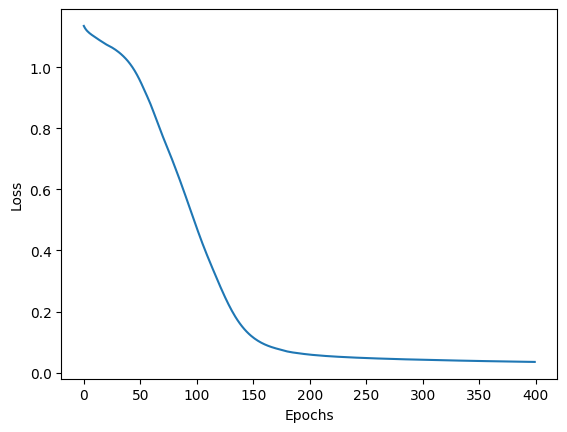

In [612]:
# Graph it out
plt.plot(range(epochs),losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [613]:
#Evaluate model on test data set
with torch.no_grad(): # turn off back propaagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)

In [614]:
loss

tensor(0.0832)

In [619]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # willl tell us what type of flower class our network think it is.
    print(f'{i+1}.) {str({y_val})} \t {y_test[i]} \t {y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'We got {correct} correct!')


1.) {tensor([  9.0374,   1.0910, -14.0768])} 	 0 	 0
2.) {tensor([  8.9918,   1.2670, -14.2434])} 	 0 	 0
3.) {tensor([  8.0939,   0.9022, -12.4861])} 	 0 	 0
4.) {tensor([-14.3352,   4.0119,  11.1947])} 	 2 	 2
5.) {tensor([-3.4251,  5.8077, -3.1366])} 	 1 	 1
6.) {tensor([-3.3938,  5.5366, -2.8086])} 	 1 	 1
7.) {tensor([-11.9733,   5.1550,   7.4119])} 	 2 	 2
8.) {tensor([-15.8114,   4.5959,  12.1522])} 	 2 	 2
9.) {tensor([-4.3532,  6.5417, -2.8496])} 	 1 	 1
10.) {tensor([-16.4889,   5.0329,  12.3854])} 	 2 	 2
11.) {tensor([  7.8788,   0.8482, -12.1433])} 	 0 	 0
12.) {tensor([-14.6844,   4.5391,  10.9921])} 	 2 	 2
13.) {tensor([-1.7249,  4.6304, -3.8972])} 	 1 	 1
14.) {tensor([-4.9233,  6.2963, -1.7050])} 	 1 	 1
15.) {tensor([  7.7931,   0.8514, -12.0081])} 	 0 	 0
16.) {tensor([-4.7074,  6.5475, -2.3581])} 	 1 	 1
17.) {tensor([  9.3817,   1.0274, -14.5094])} 	 0 	 0
18.) {tensor([  8.4394,   0.9375, -13.0333])} 	 0 	 0
19.) {tensor([  7.9015,   1.2023, -12.6279])} 	 0 	 0
2

In [621]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [630]:
model2 = Model()
model.eval()
with torch.no_grad():
  print(model2.forward(new_iris))

tensor([ 0.2074, -0.1325, -0.0147])


In [631]:
# Save our NN model
torch.save(model.state_dict(), 'model_iris.pt')

In [632]:
# Load the saved model
model3 = Model()
model3.load_state_dict(torch.load('model_iris.pt'))

<All keys matched successfully>

In [633]:
# Make sure it loaded correctly
model3.eval()

Model(
  (fc1): Linear(in_features=4, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=15, bias=True)
  (out): Linear(in_features=15, out_features=3, bias=True)
)